# Analyzing Romer's RBC model
\usepackage{ amssymb }

In this assignment we will analyze a standard RBC model presented by David Romer, starting by looking at the utility function in 1 period, thereafter looking at a simple static model and in the end a 2-period model. 

We will throughout the analysis assume the households have the following utility function:

$u(C_t, L_t) = \dfrac{C_t^{(1-\theta)}-1}{1-\theta} + b \bigg(\dfrac{(1-L_t)^{1-\omega}-1}{1-\omega}\bigg)$

Where C is consumption and L is labor(which has been normalized to 1). The parameters are as follows:

- $\theta$: Greater than 0, and describes the relative risk aversion for the individual. 
- $\omega$: Greater than 0, and describes the inversee intertemporal elasticity of substitution for the individual. 
- b: Greater than 0, controls importance for leisure. 

In the case where $\theta = \omega = 1$ the utility function will be defined as the following: 

$u(C_t, L_t) = ln(C_t) + b*ln(1-L_t)$

The lagranian is therefore: 

$\mathcal{L} = ln(C) + bln(1-L) + \lambda(wL - C)$

We will now start by defining the utility function described above: 


In [55]:
# %load Modelproject.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg, interpolate, io

#Write explaination and equations for the utility function defined
#by consumption and lesisure by Romer. 

def u(C, L): #Defining the utility function
    if theta == 1.0:
        consumption = np.log(C) #This is a condition of the simple utility flow model. 
    else:
        consumption = (C**(1-theta)-1/(1-theta))

    if omega == 1.0:
        leisure = np.log(1-L)  #This is a condition of the simple utility flow model. 
    else:
        leisure = ((1-L)**(1-omega)-1/(1-omega))

    #Flow utility is defined as:
    utility = consumption + b*leisure

    return utility

b, omega, theta = 3.0, 1.0, 1.0 #set some parameter values

u(np.exp(1),0) #Checking if the function is working properly. If result is 1, it works!

1.0

We have also chosen to set some initial parameter values to test whether the function we define works or not. As the result of the above comes out as 1, it shows the function is indeed working. 

We will now move on to creating the plot to see the relationship between consumption and labor. 

In [144]:
#We will now plot the utility function we just found defined, in a 3-dimensional plot:

#create the plot
%matplotlib widget

fig = plt.figure(figsize=(12,6))

# create a 3D Axes object
ax = fig.gca(projection='3d', elev=30, azim=310)

#Grid of (x,y) values which we will pass to function
consumption = np.linspace(0, 20, 200)
labor = np.linspace(0, 1, 20)
L, C = np.meshgrid(labor, consumption)

#Parameter values
b, theta, omega = 1.0, 0.15, 0.1

#We define utility as the function we made earlier. 
utility = u(C, L)

#Plot surface
utility_surface = ax.plot_surface(L, C, utility, rstride=1, cstride=1, cmap=mpl.cm.terrain, 
                                  linewidth=0, vmin=-2, vmax=np.max(utility), 
                                  antialiased=False)

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 20)
ax.set_xlabel(r"Labor, $L_{t}$", fontsize=15, family="serif")
ax.set_ylabel(r"Consumption, $C_{t}$", fontsize=15, family="serif")
ax.set_zlabel(r"Utility, u(C, L)", fontsize=15, family="serif")
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

ax.invert_xaxis()

# display plot
plt.show()

FigureCanvasNbAgg()

Seen above is the 3-dimensional plot of the utility function. It shows that for a higher level of consumption given a certain level of labor, the individual will obtain a higher level of utility. 

We will now look at slicing through the utility function, meaning we set a certain level of labor, and analyze the effect b has on the individual.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


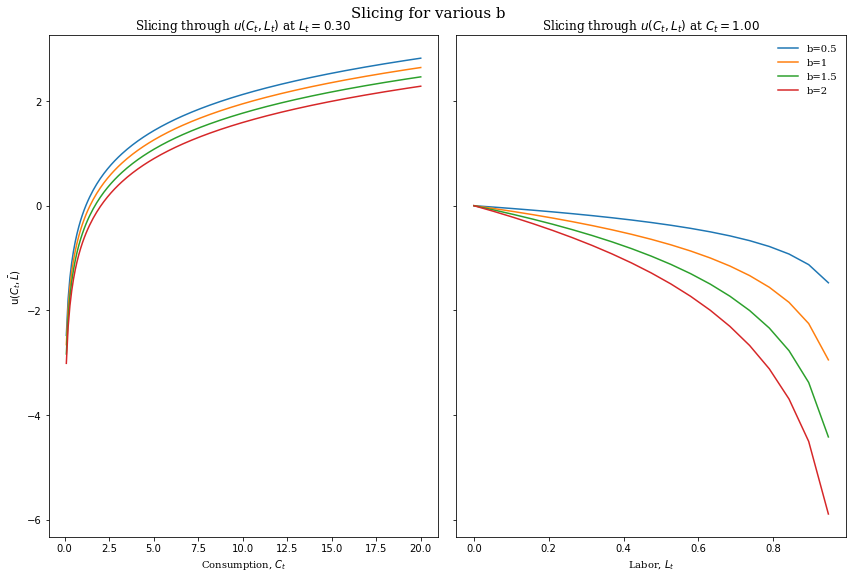

In [128]:
%matplotlib widget
%matplotlib inline

#We will now look at the effects of the parameters, by locking consumption and leisure
L_lock, C_lock = 0.3, 1
b, theta, omega = 3.0, 1.0, 1.0 #Picking arbitrary parameter values

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,8)) #We make the two plots share the same y-axis
ax1, ax2 = axes

for b in [0.5, 1.0, 1.5, 2.0]:
    #Here we lock leisure, and plot consumption and a set leisure level while varying b
    ax1.plot(consumption, u(consumption, L_lock), label = "b=%g" %b) 

    #Axes, labels, etc
    ax1.set_xlabel("Consumption, $C_t$", family="serif")
    ax1.set_ylabel(r"u$(C_t, \bar{L})$", rotation = "vertical")
    ax1.set_title("Slicing through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$" %L_lock, family="serif")

    #Next we do the same, but hold consumption locked. 
    ax2.plot(labor, u(C_lock, labor), label = "b=%g" %b)

    #Axes, labels, etc
    ax2.set_xlabel("Labor, $L_t$", family="serif")
    ax2.set_title("Slicing through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$" %C_lock, family = "serif")

ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

plt.tight_layout()
plt.suptitle('Slicing for various b', y=1.00, fontsize=15, family='serif')
plt.show()

#The results show, the more an individual values leisure (the greater b is), the less utility the indivual has 
#for a given level of consumption. Furthermore, the marginal utility of for an extra unit of labor is much more negative
#for a higher b. 

The level of utility is lower as b increases, but still maintains the same trend when looking at consumption. Looking at labor, we see the marginal utility of labor decreases as b increases. This also coincides our economic intiuition as b is the preference for leisure, and the more an individual weighs leisure, the more disutility is gained from extra labor. 




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


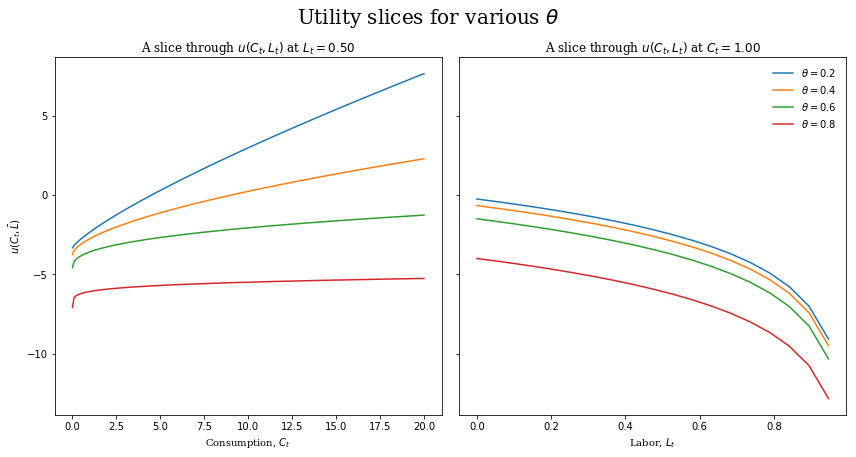

In [129]:
#We can do the same analysis for theta (risk-aversion): 
# fix l_bar and c_bar
L_lock, C_lock = 0.5, 1.0
b, theta, omega = 3.0, 1.0, 1.0

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for theta in [0.2, 0.4, 0.6, 0.8]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_lock), label=r'$\theta=%g$' %theta)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='vertical')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_lock,
                  family='serif')

    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax2.plot(labor, u(C_lock, labor), label=r'$\theta=%g$' %theta)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_lock,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle(r'Utility slices for various $\theta$', y=1.05, fontsize=20, family='serif') 

plt.show()

#For theta we have chosen to only include 0-2 because exceeding 2.0 messes with the y-axis

As we see, the higher risk aversion an individual is, the less utility is gained from consumption and vice versa. 
For labor, we see that the marginal utility of labor is unaffected by changes in theta.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


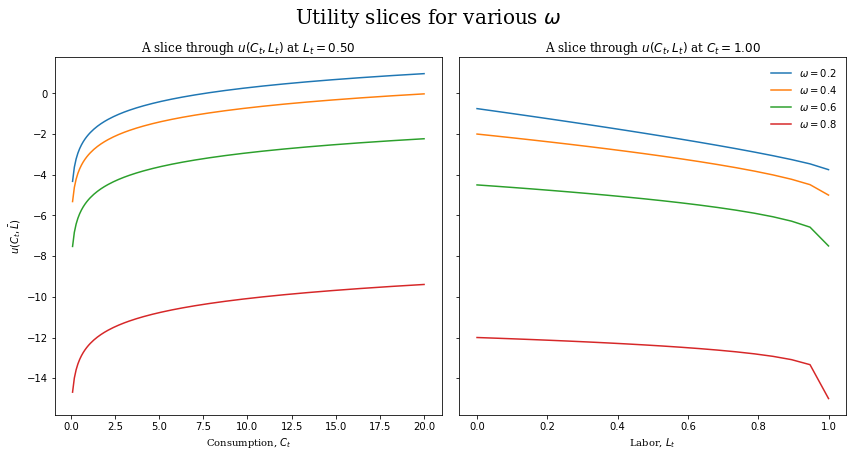

In [130]:
#And for omega

# fix l_lock and c_lock
L_lock, C_lock = 0.5, 1.0
b, theta, omega = 3.0, 1.0, 1.0

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for omega in [0.2, 0.4, 0.6, 0.8]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_lock), label=r'$\omega=%g$' %omega)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='vertical')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_lock,
                  family='serif')

    ax2.plot(labor, u(C_lock, labor), label=r'$\omega=%g$' %omega)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_lock,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle(r'Utility slices for various $\omega$', y=1.05, fontsize=20, family='serif') 

plt.show()

As the intertemporal elasticity of substitution between leisure in period 1 and 2 increases, the level of utility is also lower for the individual. 
We should also notice, that for a consumption level close to 0 utility will approach an undefined value, as is the case when labor approaches 1. This should be clear given the definition of our utility function (see above). 

Theoretically, these functions are continous, but since we have defined our parameters of discrete numbers we see a break in the continous function when labor approaches 1, and consumption is near 0. 

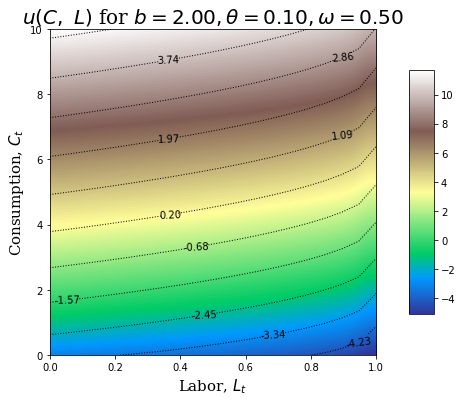

In [141]:
#Looking at the trade-off between leisure and consumption. 

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Force logarithmic preferences!
b, theta, omega = 2.0, 0.1, 0.5 #arbitrarily chosen. 

# we will actually plot output
utility = u(C, L) #we use the function from earlier 

# create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
               vmin=np.min(utility), vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

# demarcate the contours...
CS = ax.contour(L, C, utility, np.linspace(np.min(utility), np.max(utility), 20), colors=np.repeat('k', 10), 
                linewidths=1, linestyles="dotted")
ax.clabel(CS, inline=1, fmt='%1.2f')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r"Labor, $L_{t}$", fontsize=15, family='serif')
ax.set_ylabel(r"Consumption, $C_{t}$", fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
fig.colorbar(im, shrink=0.75, aspect=10)


plt.show()

## Example of the static model

We will for the sake of simplicity assume $\omega = \theta = 1$ and, look at the langranian defined earlier which gives us the following first order conditions(wrt. C, W, and $\lambda$): 

- $\dfrac{1}{C} - \lambda = 0$
- $\dfrac{-b}{1-L} - \lambda W = 0$
- $C = W*L$

\usepackage{amsmath}

This yields the following linear equation: 
$$\quad
\begin{vmatrix} 
b & W \\
1 & -W 
\end{vmatrix}
\quad\quad
\begin{vmatrix} 
C \\
L 
\end{vmatrix}
\quad = \quad 
\begin{vmatrix}
W \\ 0 
\end{vmatrix} \quad$$

This can be solved as follows:

In [142]:
# specify some model parameters
b, W, theta, omega = 2.0, 10.0, 1.0, 1.0

# Define the coefficient matrix, A, and vector of dependent values, d, for our two equation system
A = np.array([[b, W], 
              [1, -W]]) 
d = np.array([[W], 
              [0]])

# Solve the system of equations and assign the optimal choices for consumption and labor
C_star, L_star = linalg.solve(A, d)[0,0], linalg.solve(A, d)[1,0] 
u_star = u(C_star, L_star)

print("Optimal choice of consumption:         ", "{:.2f}".format(C_star))
print("Optimal choice of labor supply:        ", "{:.2f}".format(L_star))
print("Utility obtained from optimal bundle:  ", "{:.2f}".format(u_star))

Optimal choice of consumption:          3.33
Optimal choice of labor supply:         0.33
Utility obtained from optimal bundle:   0.39


Above we see the optimal choices of consumption, labor and the resulting utility for the individual.

Next we will look at how this particular bundle intercepts the budget constraint, and we will therefore show it graphically as we have done previously:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


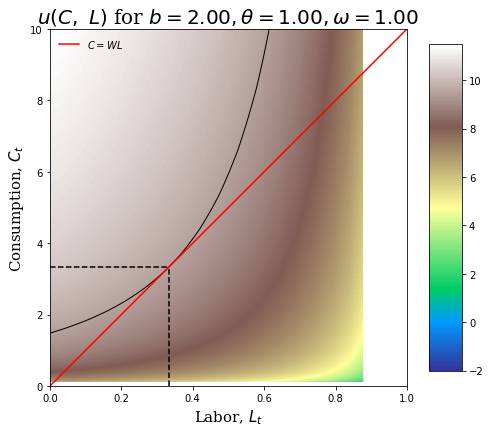

Labor:  0.33
Labor:  3.33


In [143]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# we will actually plot output
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
                vmin=-10, vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

# plot the budget constraint
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W * labor_supply, 'r-', label='$C=WL$')

# demarcate the indifference curve...
CS = ax.contour(L, C, utility, np.array([u_star]), colors='k', linewidths=1, 
                linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.4f')

# mark the optimal bundle
ax.hlines(C_star, 0, L_star, linestyle='dashed')
ax.vlines(L_star, 0, C_star, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r'Labor, $L_{t}$', fontsize=15, family='serif')
ax.set_ylabel(r'Consumption, $C_{t}$', fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
ax.legend(loc='best', frameon=False)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

plt.show()

print("Labor: ", "{:.2f}".format(L_star))
print("Labor: ", "{:.2f}".format(C_star))

From the figure above, we see utility function and the appropriate optimal choices along the red line. As we saw before, we numerically solved the problem and saw the optimal labor choice was 0.33 and the optimal consumption choice was 3.33. We see the exactly same here when showing it graphically. 

## 2-period RBC model

In static model we have just looked at, the fact that the level of the individuals wages does not effect labor supply. One could argue that real wages would have an effect on labor supply when the time horizon is more than ine period. Therefore, we will now assume that the individual households lives for two periods of time and that no uncertainty about future prices exist in this model. Due to their logarithmic preferences the households will only use a fraction of their income in period 0 and the rest in period 1. Their budget constraint can therefore be written as follows:

$C_0 + \dfrac{1}{1+r_1} C_1 = W_0 L_0 + \dfrac{1}{1+r_1} W_1 L_1$

The langranian to this is: 

$\mathcal{L} \equiv ln(C_0) + b*ln(1-L_0) + \beta \bigg[ln(C_1) + b*ln(1-L_1)\bigg]+ \lambda \bigg[C_0 + \frac{1}{1+r_1}C_1 - W_0 L_0 - \dfrac{1}{1+r_1} W_1 L_1\bigg]$




Important notes: 

The households lifetime income is represented as: $W_0 + \dfrac{1}{1+r_1}W_1$

The need the labor supply in each of the periods to be non-negative, Therefore for period t=0 the following inequality must hold: 

$\bigg(\dfrac{1}{1+r_1}\bigg)\bigg(\dfrac{W_1}{W_0}\bigg) < \bigg(\dfrac{1+b}{b}\bigg)\bigg(\dfrac{1+\beta}{\beta}\bigg) - 1$

In [140]:
#2. PERIOD MODEL - Explain the model in the notebook.
# We choose arbitrary parameter values. 
b, beta, theta, omega = 2.0, 0.50, 1.0, 1.0
 
# Specify some arbitrary prices which the household will take as given. 
W0, W1, r1 = 5, 5, 0.025

# Calculate endowment given prices.
endowment = W0 + (1 / (1 + r1)) * W1

print("Labor endowment is:", "{:.2f}".format(endowment))

# is the non-negativity constraint on l0 satisfied by your chosen prices?
(1 / (1 + r1)) * (W1 / W0) < ((((1 + b) * (1 + beta)) / b) - 1) #result is true - Constraint is satisfied. 

#Define the two matrixes derived from the model
A = np.array([[b, 0, W0, 0], 
              [beta * (1 + r1), -1, 0, 0], 
              [0, b, 0, W1], 
              [1, 1 / (1 + r1), -W0, -(1 / (1 + r1)) * W1]])

d = np.array([[W0], 
              [0], 
              [W1], 
              [0]])
# Solve the system of equations and assign the optimal choices for consumption and labor
C_0 = linalg.solve(A, d)[0,0]
C_1 = linalg.solve(A, d)[1,0] 
L_0 = linalg.solve(A, d)[2,0]
L_1 = linalg.solve(A, d)[3,0]
u_0 = u(C_0, L_0)
u_1 = u(C_1, L_1)
print("Optimal C in period 0:", "{:.2f}".format(C_0)) #Shows the optimal amount of consumption in each of the two periods
print("Optimal C in period 1:", "{:.2f}".format(C_1)) 
print("Optimal L in period 0:", "{:.2f}".format(L_0)) #Shows the optimal amount of labor in each of the two periods
print("Optimal L in period 1:", "{:.2f}".format(L_1))
print("Flow in period 0:   ", "{:.2f}".format(u_0)) #Shows utility 
print("Flow in period 1:   ", "{:.2f}".format(u_1))

Labor endowment is: 9.88
Optimal C in period 0: 2.20
Optimal C in period 1: 1.13
Optimal L in period 0: 0.12
Optimal L in period 1: 0.55
Flow in period 0:    0.53
Flow in period 1:    -1.48


We can also try and it solve it using the equations defined: 

In [137]:
print("Optimal C, t=0:", "{:.2f}".format((1 / ((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1))) #From model, will be explained in notebook
print("Optimal C, t=1:", "{:.2f}".format(((1 + r1) / (1 + b)) * (beta / (1 + beta)) * (W0 + (1 / (1 + r1)) * W1))) #From model, will be explained in notebook
print("Optimal L, t=0:", "{:.2f}".format(1 - (b / W0) * (1 /((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1))) #From model, will be explained in notebook
print("Optimal L, t=1:", "{:.2f}".format(1 - ((b * beta * (1 + r1)) / W1) * (1 /((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1))) #From model, will be explained in notebook

Optimal C, t=0: 2.20
Optimal C, t=1: 1.12
Optimal L, t=0: 0.12
Optimal L, t=1: 0.55


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
No handles with labels found to put in legend.


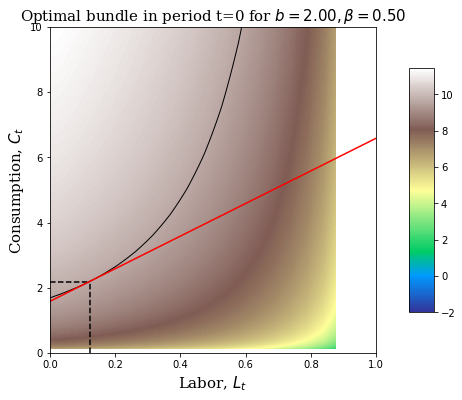

In [135]:
#We will now plot the budget constraint for t=0 and the indifference curve from earlier. 
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

#We define utility as the function as we did before
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
                vmin=-10, vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

#We plot the budget constraint. (See equation in notebook - Will be added.)
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W0 * labor_supply + (1 / (1 + r1)) * (W1 * L_1 - C_1),
        color='r')

#We plot the indifference curve
CS = ax.contour(L, C, utility, np.array([u_0]), colors='k', linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.4f')

# mark the optimal consumption and labor. 
ax.hlines(C_0, 0, L_0, linestyle='dashed')
ax.vlines(L_0, 0, C_0, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_ylabel(r'Consumption, $C_{t}$', family='serif', fontsize=15)
ax.set_xlabel(r'Labor, $L_{t}$', family='serif', fontsize=15)
ax.set_title(r'Optimal bundle in period t=0 for $b=%.2f, \beta=%.2f$' %(b, beta), 
             fontsize=15, family='serif')
ax.legend(loc=0, frameon=False)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

plt.show()

If we compared this figure to the example from the 1-period static model, we see that the individual now has to adjust his/her labor and consumption in the first period when second period consumption and labor is taken into account. The conclusion being, consumption and labor has to be lower in period 0 in this example, compared to the 1-period model. 

## Conclusion

In this project, we have programmed and analyzed the RBC model presented by David Romer, both a single- and two-period model where we determined the optimal bundles for both these examples. In the case where the individual only took 1 period into account, the optimal bundle was (C, L) = (3.33, 0.33), where as in the 2-period model we saw that for t = 0 the optimal bundle was (C, L) = (2.20, 0.12) and for t=1 it was (C, L) = (1.13, 0.55). 

We also looked at how the parameters affected the utility of the individual. Here we saw, that as b increases consumption increases as well and labor decreases. For theta, we saw that an increase caused consumption to increased and labor decreased. The patteren was the same for omega. 